<a href="https://colab.research.google.com/github/qfb-fjps/MachineLearningCourse/blob/main/Solucion_Reto_SC_63_Francisco_de_la_Pe%C3%B1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

data = pd.read_csv("1707780865175-dataset_Facebook_likes.csv",
                   sep=",",
                   header="infer"
                   )
data.head()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page total likes  500 non-null    int64  
 1   Type              500 non-null    object 
 2   Category          500 non-null    int64  
 3   Post Month        500 non-null    int64  
 4   Post Weekday      500 non-null    int64  
 5   Post Hour         500 non-null    int64  
 6   Paid              499 non-null    float64
 7   Likes             500 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 31.4+ KB


In [2]:
import numpy as np

data['Paid'] = data['Paid'].fillna(value=round(data['Paid'].mean(), 2))

data = pd.get_dummies(data, columns=['Type'], drop_first=True)

data = pd.get_dummies(data, columns=['Category'], drop_first=True)

def fun_01(x):
  return (x-x.min())/(x.max()-x.min())

data['Page total likes'] = 1 + np.power(1 - fun_01(data['Page total likes']), 0.32)

data.head()

,Page total likes,Post Month,Post Weekday,Post Hour,Paid,Likes,Type_Photo,Type_Status,Type_Video,Category_2,Category_3
0,1.0,12,4,3,0.0,0,True,False,False,True,False
1,1.0,12,3,10,0.0,0,False,True,False,True,False
2,1.0,12,3,3,0.0,0,True,False,False,False,True
3,1.0,12,2,10,1.0,1,True,False,False,True,False
4,1.0,12,2,3,0.0,1,True,False,False,True,False


## Modelo 1: *Multi-Layer Perceptron* (MLP)

In [3]:
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier

X = data[['Page total likes', 'Post Month', 'Post Weekday', 'Post Hour', 'Paid', 'Type_Photo', 'Type_Status', 'Type_Video', 'Category_2', 'Category_3']]

Y = data['Likes']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.60, random_state=42)

X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.50, random_state=42)

modelo_MLP = MLPClassifier(solver='adam',
                           hidden_layer_sizes=(9, 18),
                           activation='logistic',
                           batch_size=100,
                           learning_rate='constant',
                           learning_rate_init=0.001,
                           max_iter=1000)

modelo_MLP.fit(X_train, np.ravel(Y_train))

print('Exactitud del modelo final con el conjunto de prueba:')

round(modelo_MLP.score(X_test, Y_test),2)

Exactitud del modelo final con el conjunto de prueba:


0.65

## Modelo 2: *Random Forest Classifier* (RFC)

In [4]:
from sklearn.ensemble import RandomForestClassifier

modelo_RFC = RandomForestClassifier(n_estimators=100, random_state=42)

modelo_RFC.fit(X_train, np.ravel(Y_train))

rf_val_score = modelo_RFC.score(X_val, Y_val)

print('Exactitud del modelo final con el conjunto de prueba:')

round(modelo_RFC.score(X_test, Y_test),2)

Exactitud del modelo final con el conjunto de prueba:


0.6

## Modelo 3: *Logistic Regression* (LR)

In [5]:
from sklearn.linear_model import LogisticRegression

modelo_LR = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' is a good choice for smaller datasets or when L1 regularization is desired

modelo_LR.fit(X_train, np.ravel(Y_train))

lr_val_score = modelo_LR.score(X_val, Y_val)

print('Exactitud del modelo final con el conjunto de prueba:')

round(modelo_LR.score(X_test, Y_test),2)

Exactitud del modelo final con el conjunto de prueba:


0.57

## Comparativa de las matrices de confusión de los modelos

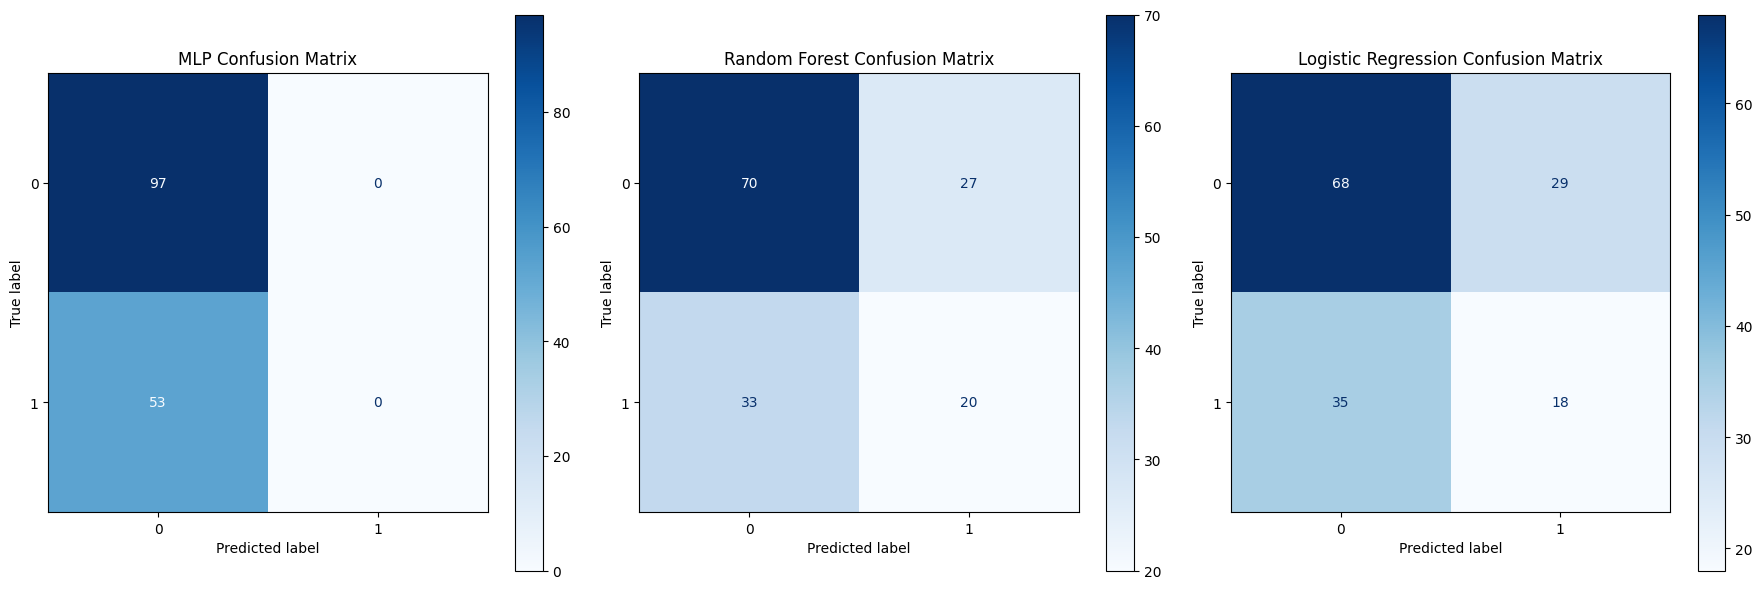

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Y_pred_MLP = modelo_MLP.predict(X_test)
Y_pred_RFC = modelo_RFC.predict(X_test)
Y_pred_LR = modelo_LR.predict(X_test)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Matriz de confusión para MLP
cm_MLP = confusion_matrix(Y_test, Y_pred_MLP)
disp_MLP = ConfusionMatrixDisplay(confusion_matrix=cm_MLP, display_labels=modelo_MLP.classes_)
disp_MLP.plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title('MLP Confusion Matrix')

# Matriz de confusión para RFC
cm_RFC = confusion_matrix(Y_test, Y_pred_RFC)
disp_RFC = ConfusionMatrixDisplay(confusion_matrix=cm_RFC, display_labels=modelo_RFC.classes_)
disp_RFC.plot(ax=axes[1], cmap=plt.cm.Blues)
axes[1].set_title('Random Forest Confusion Matrix')

# Matriz de confusión para LR
cm_LR = confusion_matrix(Y_test, Y_pred_LR)
disp_LR = ConfusionMatrixDisplay(confusion_matrix=cm_LR, display_labels=modelo_LR.classes_)
disp_LR.plot(ax=axes[2], cmap=plt.cm.Blues)
axes[2].set_title('Logistic Regression Confusion Matrix')

plt.tight_layout()
plt.show()

## *Matthews correlation coefficient* (MCC) para la evaluación de los modelos


In [10]:
from sklearn.metrics import matthews_corrcoef

# Cálculo de MCC para MLP
mcc_mlp = matthews_corrcoef(Y_test, Y_pred_MLP)
print(f'MCC del modelo MLP: {round(mcc_mlp,2)}')

# Cálculo de MCC para RFC
mcc_rfc = matthews_corrcoef(Y_test, Y_pred_RFC)
print(f'MCC del modelo Random Forest: {round(mcc_rfc,2)}')

# Cálculo de MCC para LR
mcc_lr = matthews_corrcoef(Y_test, Y_pred_LR)
print(f'MCC del modelo Logistic Regression: {round(mcc_lr,2)}')

MCC del modelo MLP: 0.0
MCC del modelo Random Forest: 0.1
MCC del modelo Logistic Regression: 0.04


## Conclusión:

El mejor de los 3 modelos evaluados en este ejercicio es el de *Random Forest Classification* (RFC) ya que, aunque su exactitud en el conjunto de prueba no fue la más alta (0.60 vs 0.65 de MLP), sí tiene el MCC más alto (0.1), que de acuerdo con [Chicco y Jurman (2023)](https://pmc.ncbi.nlm.nih.gov/articles/PMC9938573/) es el mejor hiperparámetro para evaluar la clasificación binaria.  